# <center> 👉 class_10_7_CV » _Haar Cascade Face Detection_ </center>

## Haar Cascade Face Detection  

The Har Cascade is an object detector proposed in the paper 'Rapid Object Detection using a Boosted Cascade of Simple Features' (published in 2001).
In this class, we will use the OpenCV library to practice detecting faces with the Cascade Detector.

        하르 캐스케이드는 'Rapid Object Detection using a Boosted Cascade of Simple Features' 논문(2001년 발표)에서 제안한 객체 검출기입니다.  
        여기서는 OpenCV 라이브러리를 활용해 캐스케이드 검출기로 얼굴을 검출해보겠습니다.   
https://github.com/BaekKyunShin/Computer-Vision-Basic/blob/main/Project1-Face_Detection/Haar_Cascade_Face_Detection.ipynb

In [4]:
import cv2
import matplotlib.pylab as plt

# image source : https://unsplash.com/ko/%EC%82%AC%EC%A7%84/hOF1bWoet_Q
image = cv2.imread('./images/CV/people2.webp')
image.shape 

(580, 870, 3)

In [5]:
image_resized = cv2.resize(image, (600, 400))
image_resized.shape

(400, 600, 3)

In [6]:
cv2.imshow('People', image_resized)
cv2.waitKey(0)
cv2.destroyAllWindows() 

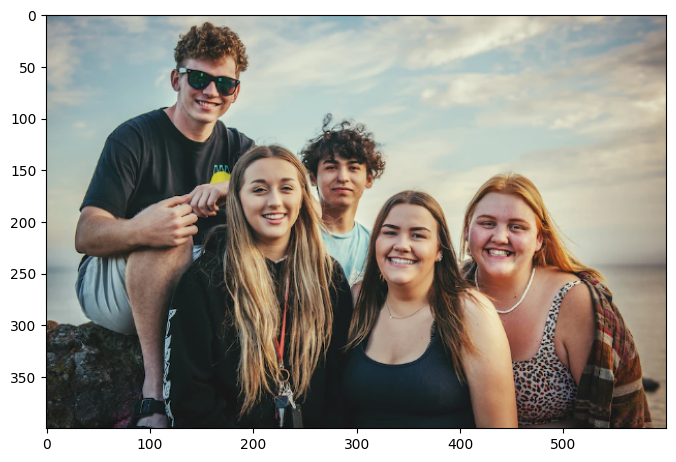

In [7]:
img = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB) 

plt.figure(figsize=(8, 8))
plt.imshow(img),plt.axis('on')
plt.show()

## 1. Face Detection with Haar Cascade Detector  

To utilize the detector, you must first train the detector.  
Training from scratch takes a long time and requires a lot of image data.  
That's why pre-trained detectors are already there.
opencv/data/haarcascades/ provides a pre-trained detector xml file that you can download here.  

        검출기를 활용하려면 검출기를 먼저 훈련해야 합니다.   
        - 처음부터 훈련하려면 시간도 오래 걸리고, 이미지 데이터도 많이 필요하겠죠?   
        - 그렇기 때문에 사전 훈련된 검출기들이 이미 있습니다.   
        - opencv/data/haarcascades/ 깃헙에서 사전 훈련된 검출기 xml 파일을 제공하니 여기서 다운로드하시면 됩니다.  
        
>- **haarcascade_frontalface_default.xml** download to your folder  
>- mygithub : under cv_data folder  https://github.com/xjnpark/Computer_Vision_2023/tree/main  
        
The OpenCV library maintains a repository of pre-trained Haar cascades. Most of these Haar cascades are used for either:

* **Face detection**
* **Eye detection**
* **Mouth detection**
* **Full/partial body detection**
* Other pre-trained Haar cascades are provided, including one for Russian license plates and another for **cat face detection**.

We can load a pre-trained Haar cascade from disk using the cv2.CascadeClassifer function:
- detector = cv2.CascadeClassifier(your_folder_path)

In [8]:
# Load prebuilt cascade classifier for detecting fontalfaces
cascade_face_detector = cv2.CascadeClassifier('./cv_data/haarcascade_frontalface_default.xml')

In [9]:
face_detections = cascade_face_detector.detectMultiScale(image_resized)
face_detections

array([[256, 124,  61,  61],
       [183, 140,  72,  72],
       [174, 106,  90,  90],
       [402, 174,  76,  76],
       [119,  36,  78,  78],
       [309, 183,  73,  73]])

face_detections

array([[256, 124,  61,  61],  
       [183, 140,  72,  72],  
       [174, 106,  90,  90],  
       [119,  36,  78,  78],  
       [402, 174,  76,  76],
       [309, 183,  73,  73]])  
There are 6 rows and 4 columns. 6 rows means 6 faces detected.   
- The first column is the x-coordinate of the upper left corner of the bounding-box surrounding the detected face,   
- The second column is the y-coordinate of the upper-left corner of the bounding box surrounding the detected face.   
- The third/fourth columns are the width and height of the bounding box, respectively.  

행이 6개, 열이 4개입니다. 행이 6개라는 건 검출된 얼굴이 6개라는 뜻입니다.   
- 첫 번째 열은 검출된 얼굴을 둘러싼 경계 박스(bounding-box)의 왼쪽 상단 모서리의 x 좌표,   
- 두 번째 열은 검출된 얼굴을 둘러싼 경계 박스의 왼쪽 상단 모서리의 y 좌표입니다.   
- 세 번째/네 번째 열은 각각 경계 박스의 너비와 높이입니다.

## ● Draw the Detected Bounding-Box in Image  

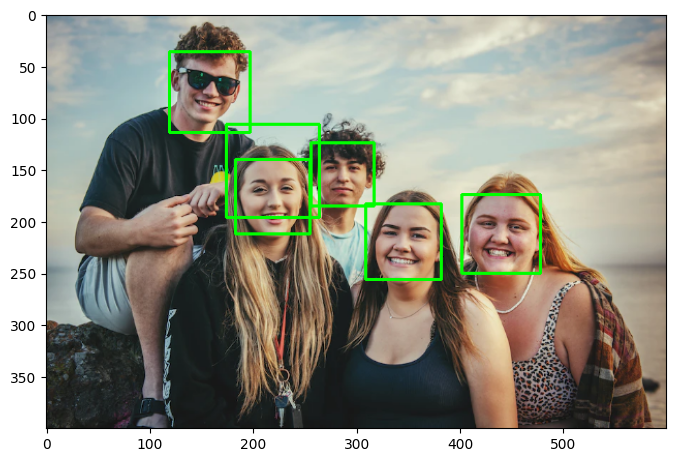

In [12]:
for (x, y, w, h) in face_detections:
    cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('People', image_resized)
cv2.waitKey(0)
cv2.destroyAllWindows() 

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)),plt.axis('on')
plt.show()

### ● scaleFactor  

- The scaleFactor parameter is a parameter related to the scale of the image.   
- Faces that are far away from the image will appear smaller, while faces that are closer will appear larger  
- Small faces are difficult to detect. So you can adjust the scaleFactor parameter to resize and detect faces.   
- Detect big faces by making them smaller, and small faces by adjusting them to be larger.  
- The default value for scaleFactor is 1.1, if it is less than that, it will get more detections. The larger it is, the fewer it detects    


- scaleFactor 파라미터는 이미지 스케일과 관련 있는 파라미터입니다.   
- 이미지에서 먼 거리에 있는 얼굴은 작게 보이고, 가까이 있는 얼굴은 크게 보입니다  
- 작은 얼굴은 감지하기가 어렵습니다. 그래서 scaleFactor 파라미터를 조정해서 크기를 조정하며 얼굴을 감지할 수 있습니다.   
- 큰 얼굴은 작게, 작은 얼굴을 크게 조정하면서 감지하는 겁니다.  
- scaleFactor의 기본값은 1.1인데, 이보다 작으면 더 많은 검출을 합니다. 클수록 검출하는 개수가 적어짐   

In [13]:
# Reload the resized image since the bounding-box is already drawn in the resized image.
image_resized = cv2.resize(image, (755, 500))
face_detections = cascade_face_detector.detectMultiScale(image_resized, scaleFactor=1.03)

for (x, y, w, h) in face_detections:
    cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('People', image_resized)
cv2.waitKey(0)
cv2.destroyAllWindows() 

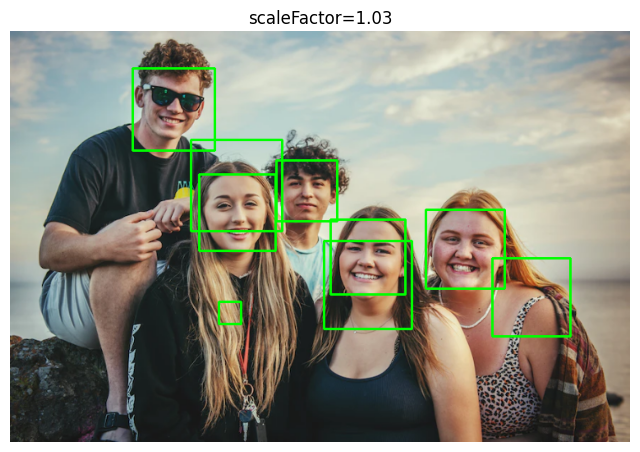

In [14]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)),plt.axis('off'),plt.title('scaleFactor=1.03')
plt.show()

In [15]:
image_resized = cv2.resize(image, (755, 500))
face_detections = cascade_face_detector.detectMultiScale(image_resized, scaleFactor=2)

for (x, y, w, h) in face_detections:
    cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('People', image_resized)
cv2.waitKey(0)
cv2.destroyAllWindows() 

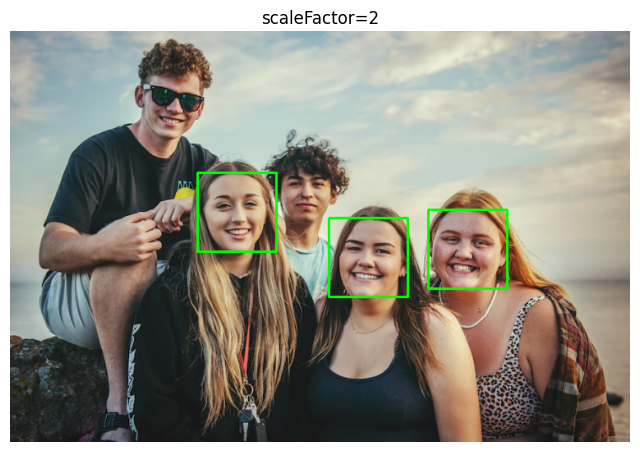

In [16]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)),plt.axis('off'),plt.title('scaleFactor=2')
plt.show()

### ● minNeighbors parameter 

- When detected with a cascade detector, it creates multiple candidate bounding boxes around the face.   
- Finally, select the boundary box that best encloses the face among several candidate bounding boxes.   
- The minNeighbors parameter is the minimum number of candidate bounding boxes that must exist around the face in order to select the final bounding box.   
- If minNeighbors=5, then a face must have at least 5 candidate bounding boxes to detect that face.  


- 캐스케이드 검출기로 검출을 하면 얼굴 주변에 여러 개의 후보 경계 박스(candidate bounding boxes)를 생성합니다.   
- 여러 후보 경계 박스 가운데 가장 얼굴을 잘 둘러싸는 경계 박스를 최종적으로 선택합니다.   
- minNeighbors 파라미터는 최종 경계 박스를 선택하기 위해 얼굴 주변에 존재해야 하는 최소 후보 경계 박스 개수입니다.   
- 만약에 minNeighbors=5라면 한 얼굴에 최소한 5개의 후보 경계 박스가 있어야 해당 얼굴을 검출합니다. 

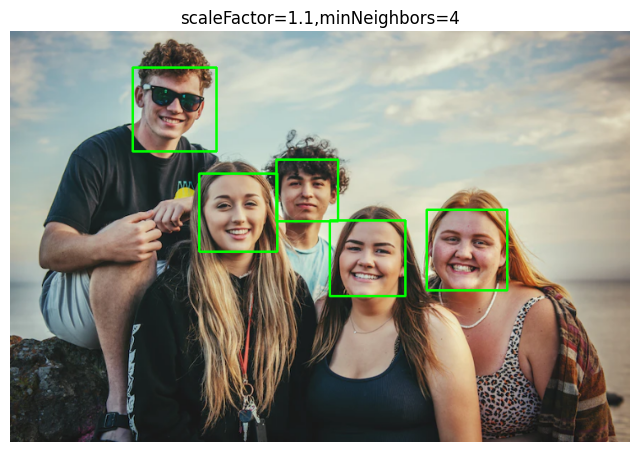

In [17]:
# Ex : scaleFactor=1.1, minNeighbors=4  

image_resized = cv2.resize(image, (755, 500))
face_detections = cascade_face_detector.detectMultiScale(image_resized, scaleFactor=1.1, minNeighbors=4)

for (x, y, w, h) in face_detections:
    cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('People', image_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)),plt.axis('off'),plt.title('scaleFactor=1.1,minNeighbors=4')
plt.show()

## 2. Eye Detection with Haar Cascade Detector 

minSize, maxSize parameter   
- minSize : minSize (30, 30)  
>- The eye is pixel smaller than (30, 30), so you need to set minSize to a value less than (30, 30).   
>- Only then can the eyes be detected.
- maxSize : max Size   

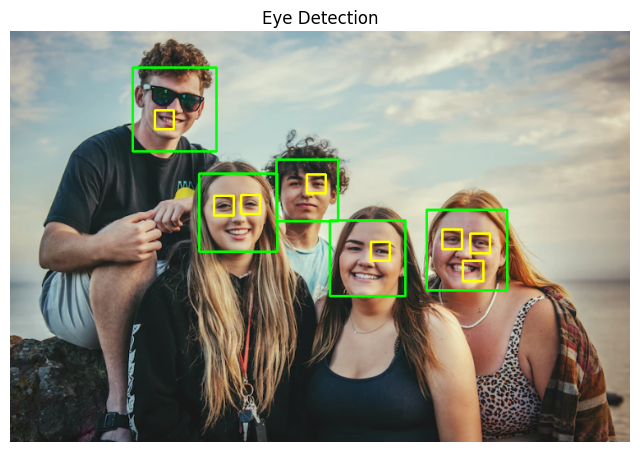

In [18]:
image_resized = cv2.resize(image, (755, 500))

# Load prebuilt cascyade classifier for detecting eye
cascade_eye_detector = cv2.CascadeClassifier('./cv_data/haarcascade_eye.xml')
eye_detections = cascade_eye_detector.detectMultiScale(image_resized, scaleFactor=1.05, minNeighbors=6,
                                                       minSize=(10, 10), maxSize=(30, 30))
# Draw face detection bounding-boxs 
for (x, y, w, h) in face_detections:
    cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Draw eye detection bounding-boxs 
for (x, y, w, h) in eye_detections:
    cv2.rectangle(image_resized, (x, y), (x + w, y + h), (0, 255, 255), 2)
    
cv2.imshow('People', image_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)),plt.axis('off'),plt.title('Eye Detection')
plt.show()

## 👉 Face/Eye Detection with Another Image  

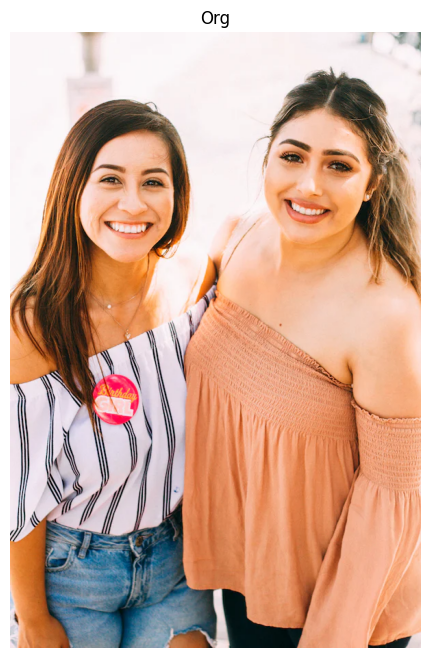

In [20]:
# image source : https://unsplash.com/ko/%EC%82%AC%EC%A7%84/Q_Sei-TqSlc
image2 = cv2.imread('./Images/CV/people9.webp')
# image2_resized = cv2.resize(image2, (500, 600))

cv2.imshow('People', image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)),plt.axis('off'),plt.title('Org')
plt.show()

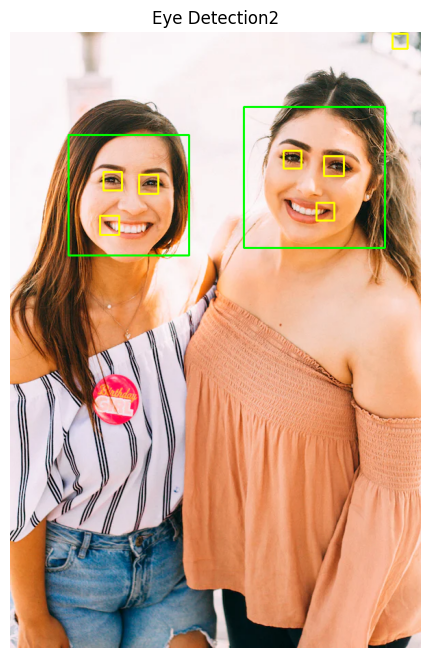

In [21]:
face_detections = cascade_face_detector.detectMultiScale(image2, scaleFactor=1.1, minNeighbors=7)
eye_detections = cascade_eye_detector.detectMultiScale(image2, scaleFactor=1.06, minNeighbors=3,
                                                       maxSize=(32, 32))
# Draw face detection bounding-boxs 
for (x, y, w, h) in face_detections:
    cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Draw eye detection bounding-boxs 
for (x, y, w, h) in eye_detections:
    cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 255), 2)
    
cv2.imshow('People', image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)),plt.axis('off'),plt.title('Eye Detection2')
plt.show()

Haar cascades, first introduced by Viola and Jones in their seminal 2001 publication, Rapid Object Detection using a Boosted Cascade of Simple Features, are arguably OpenCV’s most popular object detection algorithm.  
Sure, many algorithms are more accurate than Haar cascades (HOG + Linear SVM, SSDs, Faster R-CNN, YOLO, to name a few), but they are still relevant and useful today.  
One of the primary benefits of Haar cascades is that they are just so fast — it’s hard to beat their speed.   

That said, Haar cascades are:

- An important part of the computer vision and image processing literature
- Still used with OpenCV
- Still useful, particularly when working in resource-constrained devices when we cannot afford to use more computationally expensive object detectors

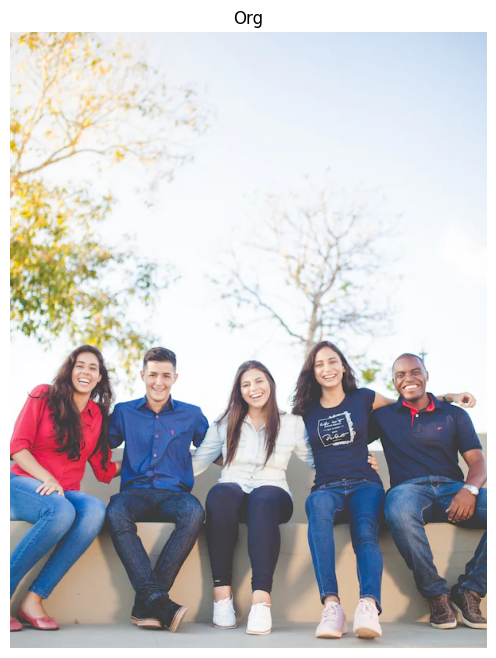

In [27]:
import cv2
import matplotlib.pylab as plt
# image source : https://unsplash.com/ko/%EC%82%AC%EC%A7%84/Q_Sei-TqSlc
image2 = cv2.imread('./Images/CV/people10.webp')
# image2_resized = cv2.resize(image2, (500, 600))

cv2.imshow('People', image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)),plt.axis('off'),plt.title('Org')
plt.show()

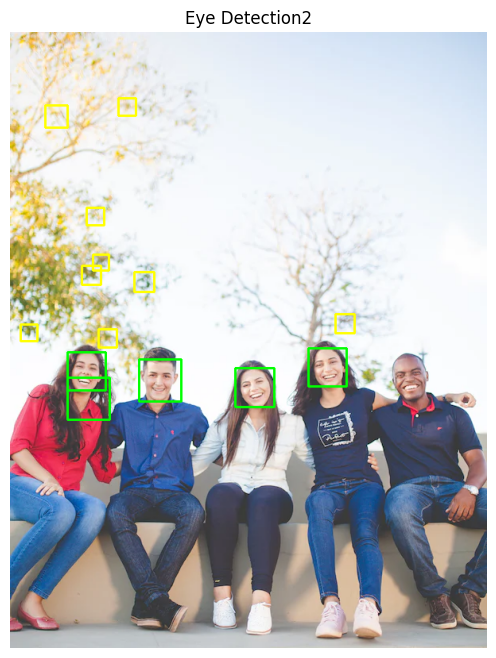

In [28]:
cascade_face_detector = cv2.CascadeClassifier('./cv_data/haarcascade_frontalface_default.xml')
cascade_eye_detector = cv2.CascadeClassifier('./cv_data/haarcascade_eye.xml')

face_detections = cascade_face_detector.detectMultiScale(image2, scaleFactor=1.1, minNeighbors=7)
eye_detections = cascade_eye_detector.detectMultiScale(image2, scaleFactor=1.06, minNeighbors=3,
                                                       maxSize=(32, 32))
# Draw face detection bounding-boxs 
for (x, y, w, h) in face_detections:
    cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Draw eye detection bounding-boxs 
for (x, y, w, h) in eye_detections:
    cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 255), 2)
    
cv2.imshow('People', image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

from matplotlib import pyplot as plt

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)),plt.axis('off'),plt.title('Eye Detection2')
plt.show()